In [10]:
import numpy as np, json, matplotlib, pycm, pandas as pd, seaborn as sn
from datetime import datetime
from conceptual_engineering_assistant import Concept, Entity, ConceptualEngineeringAssistant
from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain.document_loaders import WikipediaLoader

In [2]:
SAMPLE_SIZE = 4
females = np.random.choice(json.load(open('data/females-2023-03-15.json', 'r')), SAMPLE_SIZE)
males = np.random.choice(json.load(open('data/males-2023-03-15.json', 'r')), SAMPLE_SIZE)
non_binaries = np.random.choice(json.load(open('data/non-binaries-2023-03-15.json', 'r')), SAMPLE_SIZE*2)
trans_men = np.random.choice(json.load(open('data/trans-men-2023-03-15.json', 'r')), SAMPLE_SIZE)
trans_women = np.random.choice(json.load(open('data/trans-women-2023-03-15.json', 'r')), SAMPLE_SIZE)
sample = np.concatenate((females, trans_women, non_binaries, trans_men, males))

In [3]:
for entity in sample:
    entity["description"] = WikipediaLoader(query=entity["name"], load_max_docs=1).load()[0].page_content[:1200]

In [4]:
entities = pd.DataFrame.from_records(sample)
woman_conditions = [
    ((entities.gender == 'female') | (entities.gender == 'trans woman')),
    (entities.gender == 'non-binary'),
    ((entities.gender == 'male') | (entities.gender == 'trans man'))
]
woman_categories = ['true', 'unknown', 'false']
entities['woman'] = np.select(woman_conditions, woman_categories)
entities

,item,name,article,gender,description,woman
0,http://www.wikidata.org/entity/Q68809,Josephine Terlecki,https://en.wikipedia.org/wiki/Josephine_Terlecki,female,Josephine Terlecki (born 17 February 1986) is ...,true
1,http://www.wikidata.org/entity/Q65863,Luise Gottsched,https://en.wikipedia.org/wiki/Luise_Gottsched,female,Luise Adelgunde Victorie Gottsched (born Kulmu...,true
2,http://www.wikidata.org/entity/Q52826,Mena Grabowski Trott,https://en.wikipedia.org/wiki/Mena_Grabowski_T...,female,Mena Grabowski Trott (born Philomena Frances G...,true
3,http://www.wikidata.org/entity/Q12926,Pascale Crozon,https://en.wikipedia.org/wiki/Pascale_Crozon,female,Pascale Crozon (born 20 May 1944) was a member...,true
4,http://www.wikidata.org/entity/Q114860212,Dylan Mulvaney,https://en.wikipedia.org/wiki/Dylan_Mulvaney,trans woman,"Dylan Mulvaney (born December 29, 1996) is an ...",true
5,http://www.wikidata.org/entity/Q16149863,Arca (musician),https://en.wikipedia.org/wiki/Arca_(musician),trans woman,Alejandra Ghersi Rodríguez (born 14 October 19...,true
6,http://www.wikidata.org/entity/Q110187412,Grace Hyland,https://en.wikipedia.org/wiki/Grace_Hyland,trans woman,"Grace Elizabeth Stevenson, known professionall...",true
7,http://www.wikidata.org/entity/Q21233443,Maxine Conway,https://en.wikipedia.org/wiki/Maxine_Conway,trans woman,Maxine Conway (formerly Max) is a recurring ch...,true
8,http://www.wikidata.org/entity/Q4964534,Bree Lowdermilk,https://en.wikipedia.org/wiki/Bree_Lowdermilk,non-binary,Bree Lowdermilk (formerly Brian Lowdermilk) is...,unknown
9,http://www.wikidata.org/entity/Q106074425,Zeyn Joukhadar,https://en.wikipedia.org/wiki/Zeyn_Joukhadar,non-binary,Zeyn Joukhadar is a Syrian American writer. Jo...,unknown


In [5]:
oed_woman = Concept("oed_woman", "woman", "An adult female human being. The counterpart of man (see man, n.¹ II.4.)")

In [6]:
haslanger_woman = Concept("haslanger_woman", "woman", """S is a woman iff (i) S is regularly and for the most part observed or imagined to have 
certain bodily features presumed to be evidence of a female’s biological role in reproduction; 
(ii) that S has these features marks S within the dominant ideology of S’s society as someone who 
ought to occupy certain kinds of social position that are in fact subordinate (and so motivates 
and justifies S’s occupying such a position); and (iii) the fact that S satisfies (I) and (ii) plays 
a role in S’s systematic subordination, that is, along some dimension, S’s social position is oppressive, 
and S’s satisfying (i) and (ii) plays a role in that dimension of subordination""")

In [7]:
homosaurus_woman = Concept("homosaurus_woman", "woman", """Adults who self-identify as women and understand their gender in terms of Western conceptions of 
womanness, femaleness, and/or femininity. The term has typically been defined as adult female humans, though not all women identify with 
the term "female" depending on the context in which it is used.""")

In [8]:
cea = ConceptualEngineeringAssistant()

In [14]:
oed_classifications = pd.DataFrame( 
    [ cea.classify_entity(oed_woman, Entity(entity["item"], entity["name"], entity["description"])) for entity in sample ], 
    columns = [ 'entity' , 'classification', 'rationale' ] 
    )

In [15]:
oed_classifications

,entity,classification,rationale
0,Josephine Terlecki,true,The definition of a woman is an adult female h...
1,Luise Gottsched,true,Luise Gottsched fits the definition of a woman...
2,Mena Grabowski Trott,true,The definition of a woman is an adult female h...
3,Pascale Crozon,true,The definition of a woman is an adult female h...
4,Dylan Mulvaney,true,The definition of a woman is an adult female h...
5,Arca (musician),unknown,The description of Arca (musician) does not ex...
6,Grace Hyland,true,Grace Hyland is an adult human being who ident...
7,Maxine Conway,true,Maxine Conway can be considered a woman based ...
8,Bree Lowdermilk,true,The description of Bree Lowdermilk states that...
9,Zeyn Joukhadar,false,Based on the provided definition and informati...


In [16]:
oed_results = pd.concat([entities[["name", "gender", "woman"]], oed_classifications[["classification", "rationale"]]], axis=1)
results_styler = oed_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,woman,classification,rationale
0,Josephine Terlecki,female,true,true,"The definition of a woman is an adult female human being. The description of Josephine Terlecki indicates that she is a human being, as she is a German shot putter and participated in the 2012 Summer Olympics, activities that are typically performed by humans. Additionally, the name Josephine is typically associated with females. Therefore, based on the provided definition and the information about Josephine Terlecki, it can be argued that Josephine Terlecki is a woman."
1,Luise Gottsched,female,true,true,"Luise Gottsched fits the definition of a woman as she is an adult female human being. This is evident from the use of female pronouns such as ""she"" and ""her"" in the description. Additionally, she is referred to as a wife, which traditionally implies that she is female. Furthermore, she was born with the female name Luise, which is typically given to female individuals. Therefore, based on the provided definition and information, it can be argued that Luise Gottsched is a woman."
2,Mena Grabowski Trott,female,true,true,"The definition of a woman is an adult female human being. Mena Grabowski Trott is identified as a female in the description provided. She was born in 1977, which makes her an adult. Therefore, based on the definition and the information provided, Mena Grabowski Trott is a woman."
3,Pascale Crozon,female,true,true,"The definition of a woman is an adult female human being. Pascale Crozon is described as an individual with a female name and there is no information contradicting her being an adult or a human being. Therefore, based on the given definition and the information provided, it can be argued that Pascale Crozon is a woman."
4,Dylan Mulvaney,trans woman,true,true,"The definition of a woman is an adult female human being. The description of Dylan Mulvaney provides information that she has undergone a gender transition, which implies that she identifies and lives as a female. Therefore, based on the definition provided, Dylan Mulvaney can be considered a woman."
5,Arca (musician),trans woman,true,unknown,"The description of Arca (musician) does not explicitly state that Alejandra Ghersi Rodríguez is an adult female human being, which is the definition of a woman. However, it does mention that she has incorporated themes related to gender identity and non-binary identification in her work, particularly after coming out in 2018. This could suggest that she identifies as a woman, but without explicit confirmation, it is not possible to definitively assert that Arca (musician) is a woman based solely on the provided definition and description."
6,Grace Hyland,trans woman,true,true,"Grace Hyland is an adult human being who identifies and lives as a female. She came out as transgender at the age of twelve and has since undergone hormone replacement therapy. She has also legally changed her name to Grace, a typically female name. Furthermore, she uses her social media platforms to share her experiences and advocate for issues pertaining to transgender women. Therefore, according to the definition provided, Grace Hyland can be considered a woman."
7,Maxine Conway,trans woman,true,true,"Maxine Conway can be considered a woman based on the definition provided. The definition states that a woman is an adult female human being. Maxine Conway, as described in the text, is a male-to-female transsexual who has undergone gender reassignment surgery. This means she has transitioned from male to female, thus aligning her gender identity with that of a woman. Furthermore, she is an adult and a human being. Therefore, based on the definition provided, Maxine Conway can be classified as a woman."
8,Bree Lowdermilk,non-binary,unknown,true,"The description of Bree Lowdermilk states that they were formerly known as Brian Lowdermilk, indicating a change in gender identity. Given the definition of a woman as an adult female human being, and the co

In [17]:
haslanger_classifications = pd.DataFrame( 
    [ cea.classify_entity(haslanger_woman, Entity(entity["item"], entity["name"], entity["description"])) for entity in sample ], 
    columns = [ 'entity' , 'classification', 'rationale' ] 
    )

In [18]:
haslanger_results = pd.concat([entities[["name", "gender", "woman"]], haslanger_classifications[["classification", "rationale"]]], axis=1)
results_styler = haslanger_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,woman,classification,rationale
0,Josephine Terlecki,female,true,true,"Based on the provided definition, Josephine Terlecki can be considered a woman. This is because she is likely to have certain bodily features that are associated with the female biological role in reproduction, given that she is a female shot putter. This would satisfy condition (i) of the definition. Furthermore, as a female athlete in a society that often places women in subordinate social positions, she may be expected to occupy such positions, satisfying condition (ii). Lastly, her participation in a sport that is often dominated by men could contribute to her systematic subordination, fulfilling condition (iii). Therefore, according to the provided definition, Josephine Terlecki can be classified as a woman."
1,Luise Gottsched,female,true,true,"From the provided description, we can infer that Luise Gottsched is a woman based on the following points: (i) The description does not explicitly mention her biological features, but it does refer to her using female pronouns (""she"", ""her""), which are typically used for individuals who are observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. (ii) The description mentions that she was considered one of the most intelligent women of her time and one of Europe's leading intellects. This suggests that she was marked within the dominant ideology of her society as someone who ought to occupy certain kinds of social position. The fact that she was a woman in a time when women were often considered subordinate in society could imply that she was expected to occupy such a position. (iii) The fact that she was a woman in a society that likely had patriarchal norms could have played a role in her systematic subordination. Despite her intellectual achievements, she might have faced certain limitations or oppressions due to her gender. Therefore, based on the provided definition and the information about Luise Gottsched, it can be argued that she is a woman."
2,Mena Grabowski Trott,female,true,true,"Based on the provided definition, Mena Grabowski Trott can be considered a woman. Firstly, she is referred to with female pronouns and has a traditionally female first name, suggesting that she is regularly observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction. Secondly, her societal roles, such as being a co-founder and president of a company, do not necessarily mark her as someone who ought to occupy a subordinate social position, but it is possible that she has faced societal expectations or pressures due to her gender, which could fulfill the second part of the definition. Lastly, while the information provided does not explicitly state that Mena's social position is oppressive, it is widely known that women in the tech industry often face systematic subordination. Therefore, it can be inferred that Mena's satisfying the first two parts of the definition may play a role in that dimension of subordination."
3,Pascale Crozon,female,true,true,"Given the information provided, it can be inferred that Pascale Crozon is a woman. The description does not explicitly state her gender, but it does use the pronoun ""she"" to refer to Pascale Crozon. This pronoun is typically used to refer to individuals who are observed or imagined to have certain bodily features presumed to be evidence of a female’s biological role in reproduction, which satisfies condition (i) of the definition. Furthermore, the fact that she was a member of the National Assembly of France suggests that she occupies a certain kind of social position, which could potentially be seen as subordinate within the dominant ideology of her society, satisfying condition (ii). Lastly, her position in society and the fact that she satisfies conditions (i) and (ii) could potentially play a role in her systematic subordination,

In [19]:
homosaurus_classifications = pd.DataFrame( 
    [ cea.classify_entity(homosaurus_woman, Entity(entity["item"], entity["name"], entity["description"])) for entity in sample ], 
    columns = [ 'entity' , 'classification', 'rationale' ] 
    )

In [20]:
homosaurus_results = pd.concat([entities[["name", "gender", "woman"]], homosaurus_classifications[["classification", "rationale"]]], axis=1)
results_styler = homosaurus_results.style.set_properties(**{"text-align": "left", "overflow-wrap": "break-word"})
results_styler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]) 

,name,gender,woman,classification,rationale
0,Josephine Terlecki,female,true,true,"The description of Josephine Terlecki identifies her with female pronouns, indicating that she self-identifies as a woman. Furthermore, she is an adult, which aligns with the definition of a woman as an adult who self-identifies as a woman. Therefore, based on the provided definition and the information about Josephine Terlecki, it can be argued that she is a woman."
1,Luise Gottsched,female,true,true,"Luise Gottsched can be identified as a woman based on the provided definition. The definition states that a woman is an adult who self-identifies as such and understands their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. The text refers to Gottsched using female pronouns, indicating that she identifies as a woman. Furthermore, she is an adult, as indicated by her accomplishments as a poet, playwright, essayist, and translator. Therefore, based on the definition provided, Luise Gottsched can be classified as a woman."
2,Mena Grabowski Trott,female,true,true,"The text identifies Mena Grabowski Trott as a female adult human who self-identifies with the term ""woman"". This is evident from the use of female pronouns to refer to her and the fact that she was born as Philomena Frances Grabowski, a typically female name. Furthermore, she has not indicated any disagreement with the term ""woman"" being used to describe her. Therefore, based on the provided definition of a woman, Mena Grabowski Trott can be classified as a woman."
3,Pascale Crozon,female,true,true,"The description of Pascale Crozon does not provide explicit information about her gender identity. However, she is referred to with the pronoun ""she"", which is typically used in English to refer to individuals who identify as women. Therefore, based on the information provided, it can be inferred that Pascale Crozon identifies as a woman."
4,Dylan Mulvaney,trans woman,true,true,"Dylan Mulvaney can be identified as a woman based on the provided definition. The definition states that a woman is an adult who self-identifies as a woman and understands their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. The text mentions that Mulvaney has been detailing her gender transition in daily videos on TikTok since early 2022, which indicates that she self-identifies as a woman. Therefore, according to the given definition, Dylan Mulvaney can be classified as a woman."
5,Arca (musician),trans woman,true,unknown,"The description of Arca (musician) mentions that she has incorporated themes related to gender identity and non-binary identification in her work, particularly after coming out in 2018. This suggests that she self-identifies as a woman, which aligns with the definition of a woman as an adult who self-identifies as a woman. Furthermore, the use of female pronouns (""she"", ""her"") in the description also supports the assertion that Arca (musician) is a woman."
6,Grace Hyland,trans woman,true,true,"Grace Hyland self-identifies as a woman and understands her gender in terms of Western conceptions of womanness, femaleness, and/or femininity. This is evident from the fact that she came out as transgender at the age of twelve and has since undergone hormone replacement therapy. She also publicly changed her name to Grace, a typically female name, when she was fourteen years old. Furthermore, she uses her online platform to share her experiences and address issues pertaining to transgender people, specifically about life as a transgender woman. Therefore, based on the provided definition, Grace Hyland can be considered a woman."
7,Maxine Conway,trans woman,true,true,"Maxine Conway can be considered a woman based on the provided definition. The definition states that a woman is an adult who self-identifies as a woman and understands their gender in terms of Western conceptions of womanness, femaleness, and/or femininity. Maxine Co

In [21]:
def confusion_matrix(results):
    return results[["gender", "classification"]].groupby(['gender','classification'], sort=False).size().unstack(fill_value=0)[["true", "unknown", "false"]]

In [22]:
def confusion_matrix_2(results):
    return results[["woman", "classification"]].groupby(['woman','classification'], sort=False).size().unstack(fill_value=0)[["true", "unknown", "false"]]

<Axes: xlabel='classification', ylabel='gender'>

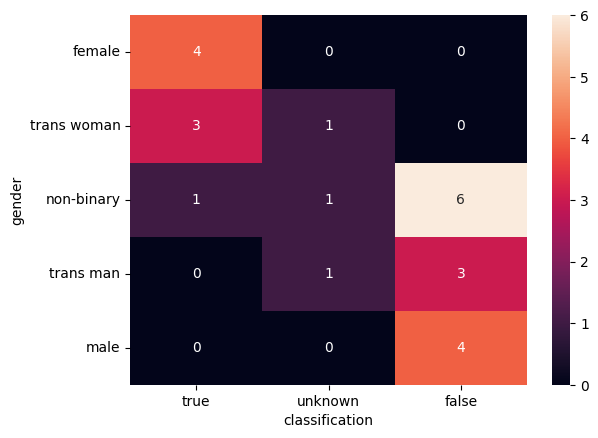

In [23]:
sn.heatmap(confusion_matrix(oed_results), annot=True)

<Axes: xlabel='classification', ylabel='woman'>

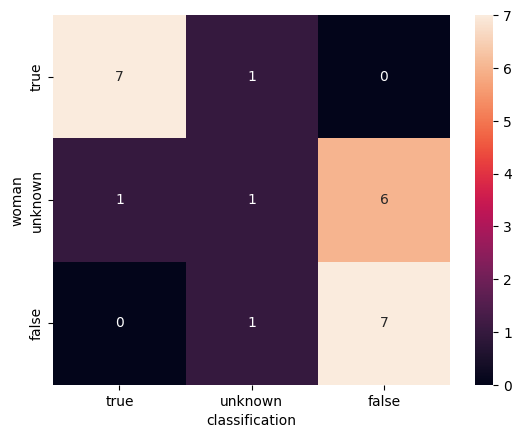

In [24]:
sn.heatmap(confusion_matrix_2(oed_results), annot=True)

In [25]:
oed_cm = pycm.ConfusionMatrix(oed_results["woman"].tolist(), oed_results["classification"].tolist(), digit=2, classes=['true', 'unknown', 'false'])
print(f'Accuracy: {oed_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s pi: {oed_cm.PI:.2f}')

Accuracy: 0.62
Scott's pi: 0.42


<Axes: xlabel='classification', ylabel='gender'>

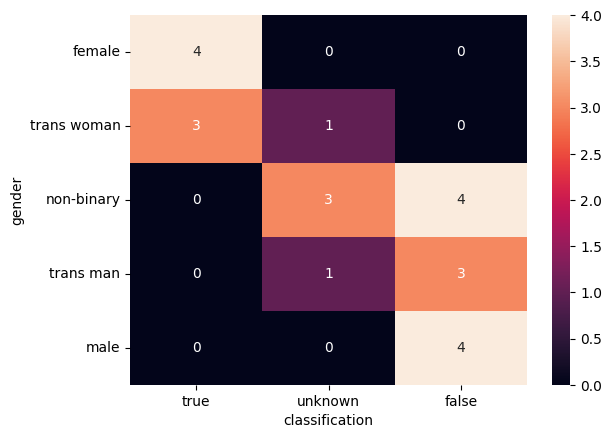

In [26]:
sn.heatmap(confusion_matrix(haslanger_results), annot=True)

<Axes: xlabel='classification', ylabel='woman'>

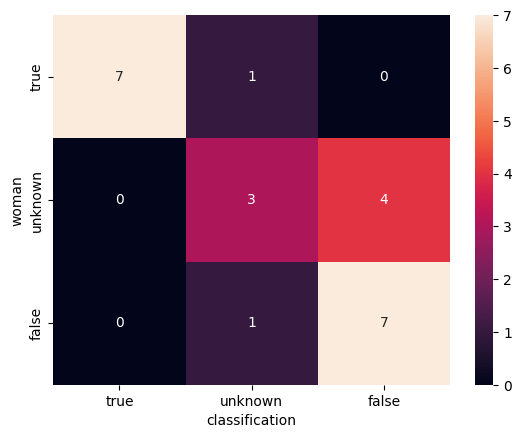

In [27]:
sn.heatmap(confusion_matrix_2(haslanger_results), annot=True)

In [28]:
haslanger_cm = pycm.ConfusionMatrix(haslanger_results["woman"].tolist(), haslanger_results["classification"].tolist(), digit=2, classes=['true', 'unknown', 'false'])
print(f'Accuracy: {haslanger_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s pi: {haslanger_cm.PI:.2f}')

Accuracy: 0.74
Scott's pi: 0.60


<Axes: xlabel='classification', ylabel='gender'>

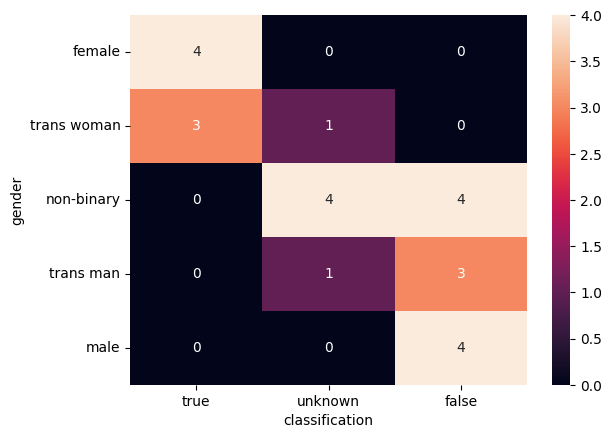

In [29]:
sn.heatmap(confusion_matrix(homosaurus_results), annot=True)

<Axes: xlabel='classification', ylabel='woman'>

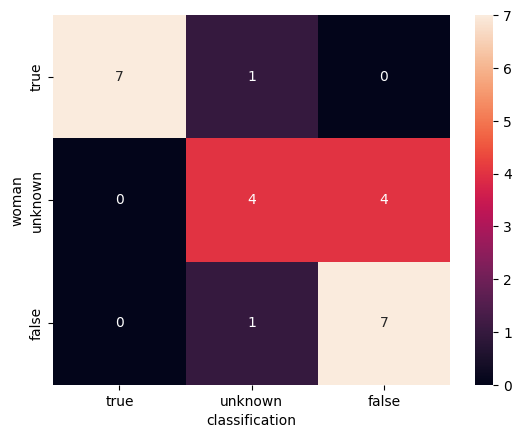

In [30]:
sn.heatmap(confusion_matrix_2(homosaurus_results), annot=True)

In [31]:
homosaurus_cm = pycm.ConfusionMatrix(homosaurus_results["woman"].tolist(), homosaurus_results["classification"].tolist(), digit=2, classes=['true', 'unknown', 'false'])
print(f'Accuracy: {homosaurus_cm.overall_stat["Overall ACC"]:.2f}')
print(f'Scott\'s pi: {homosaurus_cm.PI:.2f}')

Accuracy: 0.75
Scott's pi: 0.62


In [32]:
def evaluation_record(model, concept, data):
    return {
        "created": datetime.now().isoformat(),
        "model": {
            "name": cea.model_name,
            "temperature": cea.temperature,
        },
        "concept": concept.to_json(),
        "data": data.to_dict('records'),
    }

In [33]:
oed_evaluation_record = evaluation_record(cea, oed_woman, pd.concat([entities, oed_classifications], axis=1))
haslanger_evaluation_record = evaluation_record(cea, haslanger_woman, pd.concat([entities, haslanger_classifications], axis=1))
homosaurus_evaluation_record = evaluation_record(cea, homosaurus_woman, pd.concat([entities, homosaurus_classifications], axis=1))
json.dump(
    oed_evaluation_record, 
    open(f'data/{oed_evaluation_record["model"]["name"]}_{oed_evaluation_record["concept"]["id"]}_{oed_evaluation_record["created"]}.json', 'w')
)
json.dump(
    haslanger_evaluation_record, 
    open(f'data/{haslanger_evaluation_record["model"]["name"]}_{haslanger_evaluation_record["concept"]["id"]}_{haslanger_evaluation_record["created"]}.json', 'w')
)
json.dump(
    homosaurus_evaluation_record, 
    open(f'data/{homosaurus_evaluation_record["model"]["name"]}_{homosaurus_evaluation_record["concept"]["id"]}_{homosaurus_evaluation_record["created"]}.json', 'w')
)